In [15]:
import pandas as pd

REDDIT = "data/reddit_Battlefield_comments_2025-08-19_17-53-40.csv"
ANEW = "data/anew.csv"

df_reddit = pd.read_csv(REDDIT)
df_anew = pd.read_csv(ANEW)

In [16]:
df_reddit.head()

,subreddit,post_id,post_title,post_index_in_hot,post_permalink,comment_id,author,body,score,created_utc,parent_id,is_submitter
0,Battlefield,1mk0tn7,Battlefield 6 Open Beta: Feedback Megathread,1,https://www.reddit.com/r/Battlefield/comments/...,n7fpio8,djdelight,"Add ""request orders"" so you become squad leade...",190,1.754581e+09,t3_1mk0tn7,False
1,Battlefield,1mk0tn7,Battlefield 6 Open Beta: Feedback Megathread,1,https://www.reddit.com/r/Battlefield/comments/...,n7f6zfl,ArcadianEuphoria,"The settings menu is very clunky (PS5), the se...",246,1.754576e+09,t3_1mk0tn7,False
2,Battlefield,1mk0tn7,Battlefield 6 Open Beta: Feedback Megathread,1,https://www.reddit.com/r/Battlefield/comments/...,n7f7e2b,aPriori07,Show revives on the main scoreboard.,384,1.754576e+09,t3_1mk0tn7,False
3,Battlefield,1mk0tn7,Battlefield 6 Open Beta: Feedback Megathread,1,https://www.reddit.com/r/Battlefield/comments/...,n7ftric,Redlodger0426,I wish health was on the right side of the hud...,65,1.754583e+09,t3_1mk0tn7,False
4,Battlefield,1mk0tn7,Battlefield 6 Open Beta: Feedback Megathread,1,https://www.reddit.com/r/Battlefield/comments/...,n7fg8it,speedballandcrack,Non squad team mates should have class symbols...,125,1.754579e+09,t3_1mk0tn7,False


In [17]:
comment = df_reddit['post_title'].unique()
print(comment)

['Battlefield 6 Open Beta: Feedback Megathread'
 'It looks like many people here don’t know how closed weapons work so here is the graph. No, playing as a support doesn’t mean you have to run around with an LMG.'
 'who else mained the AK-205 during the beta?'
 'BF1 atmosphere still beats BF6'
 'My experience 😂 still love battlefield though.'
 'Returned to BF3 to do a nostalgia reality check after 46 hours of BF6 beta'
 'Atleast they have good humour🪑'
 'Did anybody else experience these artifacts during the BF6 Beta?'
 'Wanna sell cool skins? Check your last MoH games'
 'Deployable cover is repairable !'
 "Don't let the streamers kill Battlefield, too. I hope DICE is strong enough to withstand the pressure"
 'What to play after BF6 beta?' '20 Million players in BF6 open beta'
 'How i enjoy BF2042 to Unlock all the Gems for BF6'
 'We need suppression to affect aim. This is not *it*.'
 'DICE for the love of god, put this skins in Battlefield 6.'
 'Battlefield 2042 Update 9.2 Boosts Playe

In [19]:
df_anew = df_anew.copy()
df_anew["term"] = df_anew["term"].astype(str).str.strip().str.lower()
anew_terms = set(df_anew["term"])

s = df_reddit["body"].astype(str).str.lower()
s = s.str.replace(r"http\S+|www\.\S+", " ", regex=True)
s = s.str.replace(r"[^a-z\s']", " ", regex=True)
s = s.str.replace("'", "", regex=False)
tokens = s.str.split()

words = tokens.explode().dropna()
words = words[words.isin(anew_terms)]

anew_counts = words.value_counts().rename_axis("term").reset_index(name="count")

cols_scores = [c for c in df_anew.columns if c != "term"]
anew_counts_with_scores = anew_counts.merge(
    df_anew[["term"] + cols_scores], on="term", how="left"
)

anew_counts.head(20), anew_counts_with_scores.head(20)


(       term  count
 0      game    338
 1    people    142
 2      time    131
 3      good    112
 4       fun     80
 5    weapon     52
 6       gun     41
 7      free     40
 8      love     40
 9    pretty     34
 10      man     34
 11  assault     32
 12   damage     30
 13      hit     28
 14   health     26
 15     hard     24
 16     hope     24
 17     fire     24
 18    money     23
 19      god     22,
        term  count   pleasure    arousal  dominance
 0      game    338  79.138322  66.780045  64.625850
 1    people    142  83.106576  67.346939  69.614512
 2      time    131  60.204082  52.607710  52.494331
 3      good    112  84.693878  61.564626  72.675737
 4       fun     80  94.897959  81.859410  77.097506
 5    weapon     52  45.011338  68.367347  58.843537
 6       gun     41  39.342404  79.591837  40.022676
 7      free     40  93.650794  58.390023  71.995465
 8      love     40  98.866213  73.015873  80.612245
 9    pretty     34  87.868481  68.367347  62.358

In [20]:
total_count = anew_counts_with_scores["count"].sum()

pleasure_mean = (anew_counts_with_scores["pleasure"] * anew_counts_with_scores["count"]).sum() / total_count
arousal_mean  = (anew_counts_with_scores["arousal"]  * anew_counts_with_scores["count"]).sum() / total_count
domin_mean    = (anew_counts_with_scores["dominance"]* anew_counts_with_scores["count"]).sum() / total_count

print("Pontuação média nos comentários:")
print(f"Pleasure  : {pleasure_mean:.2f}")
print(f"Arousal   : {arousal_mean:.2f}")
print(f"Dominance : {domin_mean:.2f}")


Pontuação média nos comentários:
Pleasure  : 68.42
Arousal   : 62.96
Dominance : 61.61


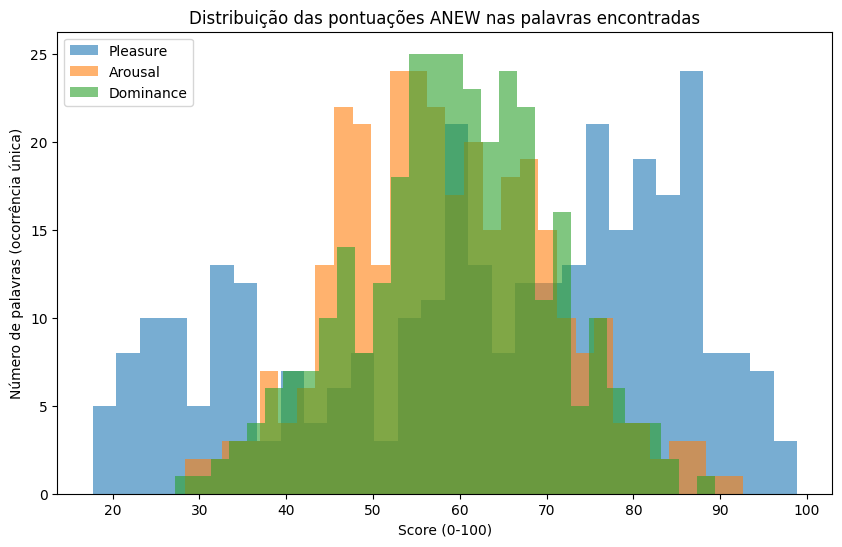

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(anew_counts_with_scores["pleasure"].dropna(), bins=30, alpha=0.6, label="Pleasure")
plt.hist(anew_counts_with_scores["arousal"].dropna(), bins=30, alpha=0.6, label="Arousal")
plt.hist(anew_counts_with_scores["dominance"].dropna(), bins=30, alpha=0.6, label="Dominance")
plt.xlabel("Score (0-100)")
plt.ylabel("Número de palavras (ocorrência única)")
plt.title("Distribuição das pontuações ANEW nas palavras encontradas")
plt.legend()
plt.show()


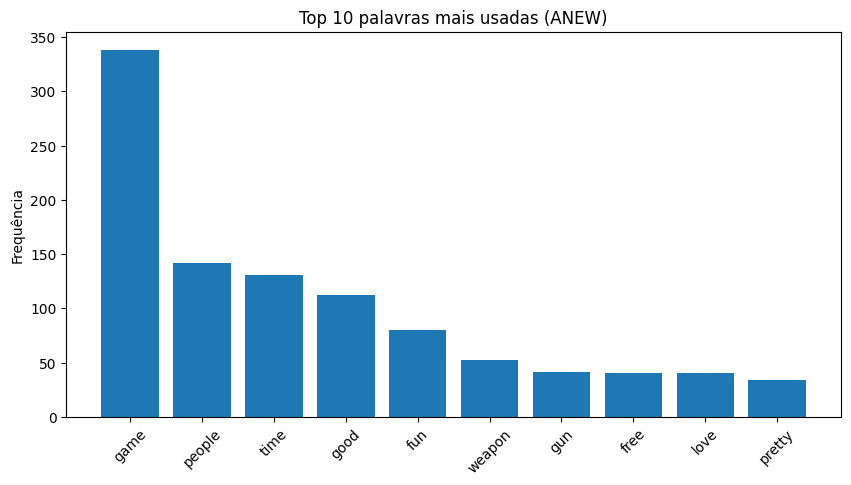

In [22]:
top10 = anew_counts.sort_values("count", ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top10["term"], top10["count"])
plt.xticks(rotation=45)
plt.title("Top 10 palavras mais usadas (ANEW)")
plt.ylabel("Frequência")
plt.show()


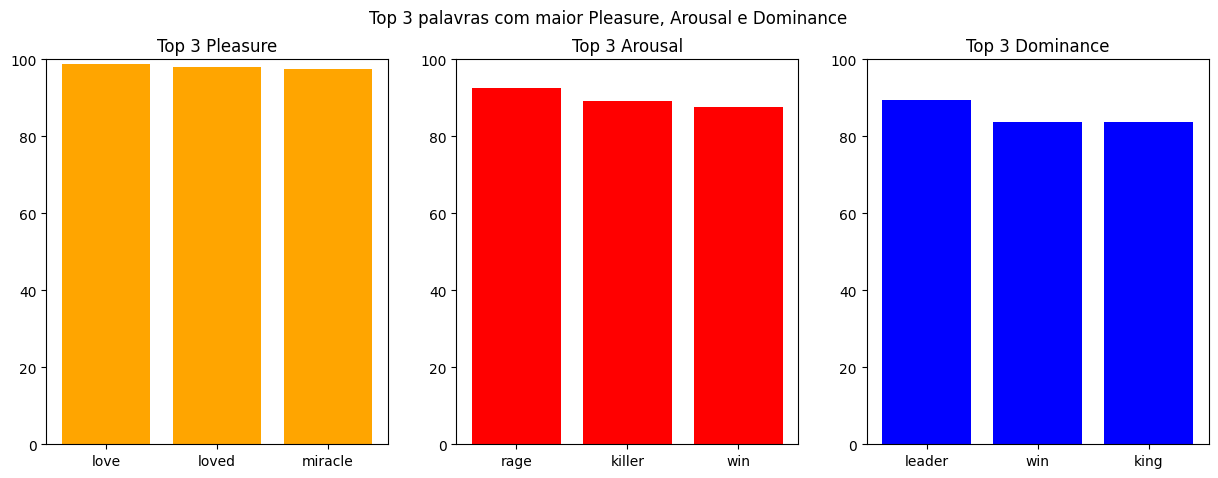

In [23]:
# Top 3 por pleasure
top3_pleasure = anew_counts_with_scores.sort_values("pleasure", ascending=False).head(3)

# Top 3 por arousal
top3_arousal = anew_counts_with_scores.sort_values("arousal", ascending=False).head(3)

# Top 3 por dominance
top3_dominance = anew_counts_with_scores.sort_values("dominance", ascending=False).head(3)

fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].bar(top3_pleasure["term"], top3_pleasure["pleasure"], color="orange")
axs[0].set_title("Top 3 Pleasure")
axs[0].set_ylim(0,100)

axs[1].bar(top3_arousal["term"], top3_arousal["arousal"], color="red")
axs[1].set_title("Top 3 Arousal")
axs[1].set_ylim(0,100)

axs[2].bar(top3_dominance["term"], top3_dominance["dominance"], color="blue")
axs[2].set_title("Top 3 Dominance")
axs[2].set_ylim(0,100)

plt.suptitle("Top 3 palavras com maior Pleasure, Arousal e Dominance")
plt.show()
